In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [3]:
little_women = Table.read_table(path_data + 'little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

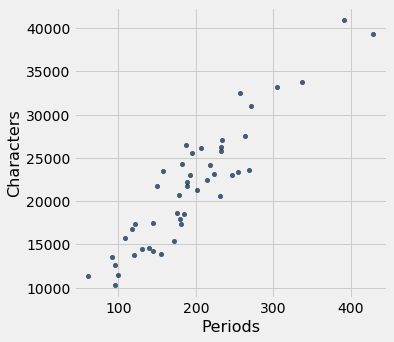

In [4]:
little_women.scatter('Periods', 'Characters')

In [5]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

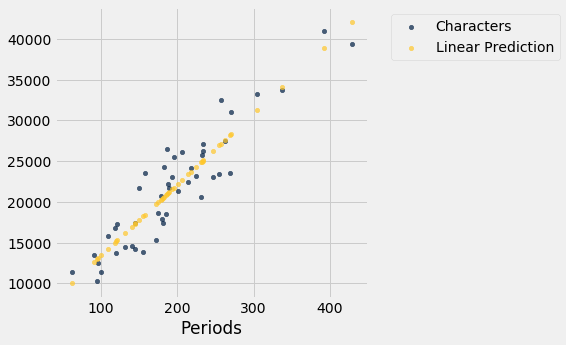

In [6]:
lw_with_predictions = little_women.with_column('Linear Prediction', fit(little_women, 'Periods', 'Characters'))
lw_with_predictions.scatter('Periods')

In [7]:
actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

In [8]:
lw_with_predictions.with_column('Error', errors)

Periods | Characters | Linear Prediction | Error
189     | 21759      | 21183.6           | 575.403
188     | 22148      | 21096.6           | 1051.38
231     | 20558      | 24836.7           | -4278.67
195     | 25526      | 21705.5           | 3820.54
255     | 23395      | 26924.1           | -3529.13
140     | 14622      | 16921.7           | -2299.68
131     | 14431      | 16138.9           | -1707.88
214     | 22476      | 23358             | -882.043
337     | 33767      | 34056.3           | -289.317
185     | 18508      | 20835.7           | -2327.69
... (37 rows omitted)

In [9]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

In [10]:

sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


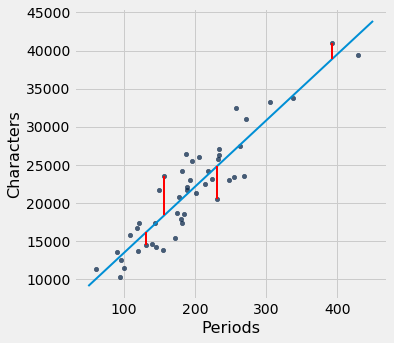

In [11]:
print('Slope of Regression Line:    ', np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

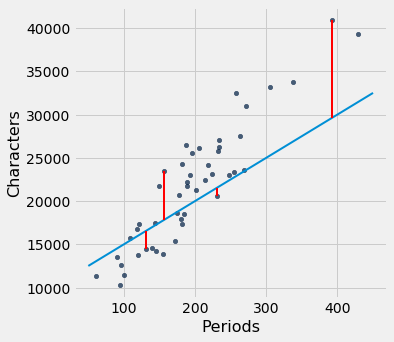

In [12]:
lw_errors(50, 10000)

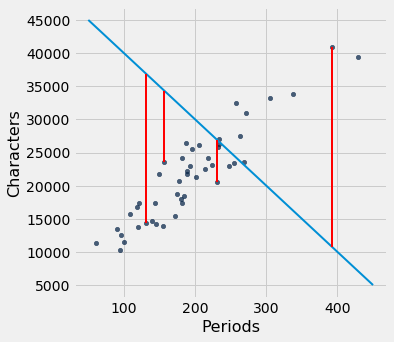

In [13]:
lw_errors(-100, 50000)

In [14]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


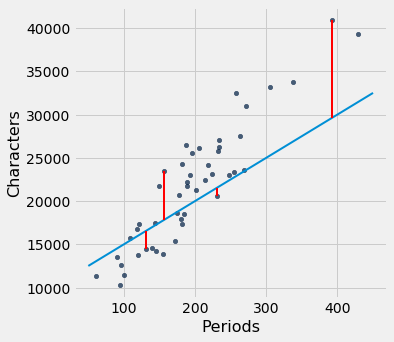

In [15]:
lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


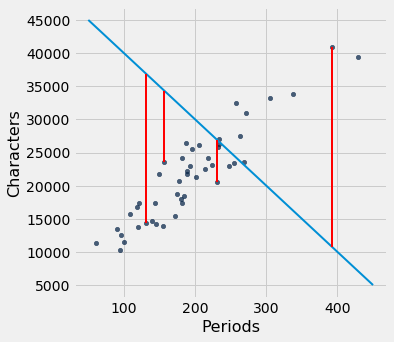

In [16]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.5391063834586


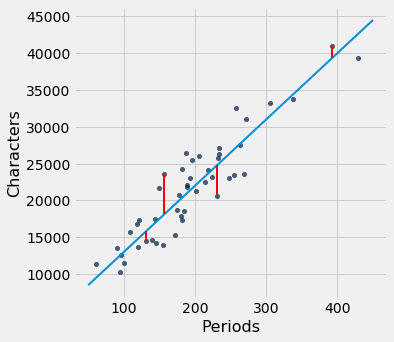

In [17]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


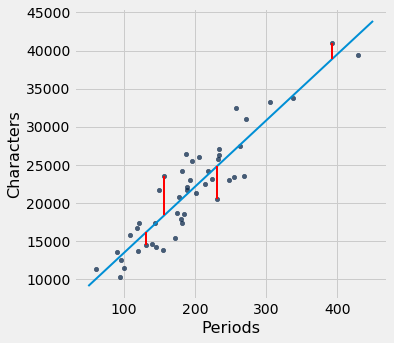

In [18]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [19]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [20]:
lw_mse(lw_reg_slope, lw_reg_intercept)**0.5

2701.690785311856

Root mean squared error: 2701.690785311856


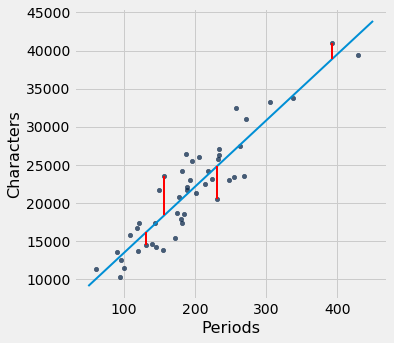

In [21]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [22]:
lw_mse(-100, 50000)**0.5

16710.11983735375

In [23]:
lw_mse(90, 4000)**0.5

2715.5391063834586

In [24]:
best = minimize(lw_mse)
best

array([  86.97784117, 4744.78484535])

In [25]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best.item(0))
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best.item(1))

slope from formula:         86.97784125829821
slope from minimize:        86.97784116615884
intercept from formula:     4744.784796574928
intercept from minimize:    4744.784845352655
